In [91]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from sklearn.model_selection import train_test_split
import statistics as st
from cvxopt import matrix, solvers

In [92]:
df=pd.read_csv("/content/Iris1.csv")
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [93]:
## here 0 stands for setosa and 1 stands for versicolor

x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values


In [94]:
m,n = x.shape
print('x[1]={} y[1]={}'.format(x[1],y[1]))

x[1]=[4.9 3.  1.4 0.2] y[1]=0


In [95]:
df0 = df[:49]
df1 = df[49:]


In [96]:
import matplotlib.pyplot as plt
%matplotlib inline

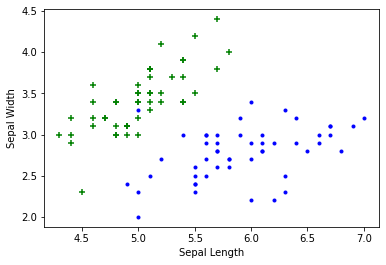

In [97]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['SepalLengthCm'], df0['SepalWidthCm'],color="green",marker='+')
plt.scatter(df1['SepalLengthCm'], df1['SepalWidthCm'],color="blue",marker='.')

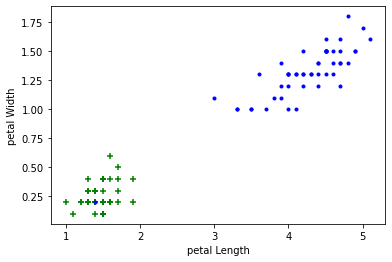

In [98]:
plt.xlabel('petal Length')
plt.ylabel('petal Width')
plt.scatter(df0['PetalLengthCm'], df0['PetalWidthCm'],color="green",marker='+')
plt.scatter(df1['PetalLengthCm'], df1['PetalWidthCm'],color="blue",marker='.')

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X = df.drop(['Species'], axis='columns')
y = df.Species

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [102]:
type(y_train)

pandas.core.series.Series

In [103]:
m0 = len(X_train)
m0

80

In [104]:
w0 = len(X_train.columns)
w0

4

In [105]:
len(X_test)

20

In [106]:
import statistics as st

In [107]:
from scipy import optimize

In [108]:
length=len(df)
width=len(df.columns)
width

5

In [109]:
print(X_train.shape)
P= matrix((np.identity(4)))
type(P)

(80, 4)


cvxopt.base.matrix

In [110]:
print(P)

[ 1.00e+00  0.00e+00  0.00e+00  0.00e+00]
[ 0.00e+00  1.00e+00  0.00e+00  0.00e+00]
[ 0.00e+00  0.00e+00  1.00e+00  0.00e+00]
[ 0.00e+00  0.00e+00  0.00e+00  1.00e+00]



In [111]:
Q=matrix(np.zeros(4).reshape(4,1))
type(Q)
print(Q.size)

(4, 1)


In [112]:
print(Q)

[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]



In [113]:
H=matrix((np.ones(80).reshape(80,1))*(-1))
type(H)
print(H.size)

(80, 1)


In [114]:
len(X_train)
y_train.shape
for i in range(m0):
    if y_train.iloc[i] ==0:
        X_train.iloc[i] = X_train.iloc[i]*(-1)
X_train
#Z = matrix(X_train.iloc[i])
#print(Z)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
48,-5.3,-3.7,-1.5,-0.2
18,-5.7,-3.8,-1.7,-0.3
39,-5.1,-3.4,-1.5,-0.2
6,-4.6,-3.4,-1.4,-0.3
19,-5.1,-3.8,-1.5,-0.3
...,...,...,...,...
54,6.5,2.8,4.6,1.5
83,6.0,2.7,5.1,1.6
40,-5.0,-3.5,-1.3,-0.3
3,-4.6,-3.1,-1.5,-0.2


In [115]:
Z= X_train * (-1)
print(Z)
type(Z)

    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
48            5.3           3.7            1.5           0.2
18            5.7           3.8            1.7           0.3
39            5.1           3.4            1.5           0.2
6             4.6           3.4            1.4           0.3
19            5.1           3.8            1.5           0.3
..            ...           ...            ...           ...
54           -6.5          -2.8           -4.6          -1.5
83           -6.0          -2.7           -5.1          -1.6
40            5.0           3.5            1.3           0.3
3             4.6           3.1            1.5           0.2
46            5.1           3.8            1.6           0.2

[80 rows x 4 columns]


pandas.core.frame.DataFrame

In [116]:
G = matrix(Z.to_numpy())
type(G)
#print(G)

cvxopt.base.matrix

In [117]:
from cvxopt import matrix, solvers


In [118]:
sol =solvers.qp(P,Q,G,H)
hyperplane= pd.Series(sol['x'])


     pcost       dcost       gap    pres   dres
 0:  2.6743e-01  8.8073e+00  2e+02  2e+00  2e+02
 1:  1.6865e+00 -1.3132e+01  2e+01  1e-01  2e+01
 2:  1.4695e+00  2.0248e-01  1e+00  4e-16  6e-15
 3:  9.8357e-01  5.6215e-01  4e-01  6e-16  9e-15
 4:  9.1214e-01  8.2108e-01  9e-02  4e-16  2e-13
 5:  8.9410e-01  8.9061e-01  3e-03  4e-16  6e-14
 6:  8.9370e-01  8.9360e-01  1e-04  4e-16  2e-12
 7:  8.9369e-01  8.9368e-01  7e-06  4e-16  4e-12
 8:  8.9369e-01  8.9369e-01  7e-08  4e-16  3e-12
Optimal solution found.


In [119]:

print(hyperplane)

0   -0.418546
1   -0.306714
2    1.089391
3    0.575631
dtype: float64


In [120]:
type(hyperplane)

pandas.core.series.Series

In [121]:
type(X_train)

pandas.core.frame.DataFrame

In [122]:
xtrain = matrix(X_train.to_numpy())

In [123]:
type(xtrain)

cvxopt.base.matrix

In [124]:
result = matrix(np.zeros((80,1)))


In [125]:
#print(xtrain)
print(hyperplane)

0   -0.418546
1   -0.306714
2    1.089391
3    0.575631
dtype: float64


In [126]:
res=np.dot(X_train,hyperplane)
result = np.where(res==np.amin(res))

print(res)






[1.60392078 1.52656912 1.42819749 1.27030053 1.49331983 2.70113111
 1.74715097 1.1622775  2.38462124 1.94992594 2.50170969 1.7423148
 1.09079763 2.3300516  1.94824899 2.26916898 1.3464505  1.00695846
 1.         1.335883   2.23202524 1.20533361 1.29175087 1.64577537
 1.07782261 1.87091247 1.68234397 2.01471781 1.37245159 1.33074196
 1.         2.49595311 1.84413556 1.9508269  2.3649627  2.04994425
 1.97031505 2.39896834 1.51024486 2.04858281 1.43680262 2.40607158
 2.48342324 1.438635   1.00000018 1.96034831 1.26652092 2.19936175
 1.56780799 1.19369458 2.36268517 2.79784093 1.46399494 1.31003733
 1.09049725 1.82496293 1.3863429  1.31003733 1.86453981 2.04932853
 1.31003733 2.34381274 2.10553022 2.39215484 1.80987011 1.55662477
 1.41731465 1.73476606 1.50072345 1.56826379 2.09844195 2.22851608
 2.81430997 1.23040813 1.15471828 2.29530025 3.13750336 1.5773294
 1.12691042 1.44194384]


In [127]:
r=0
for i in range(80) :
  if ((res[i]>1)):
    r=r+1
r   

      


80

In [128]:
restest=np.dot(X_test,hyperplane)
s=0
for i in range(len(X_test)) :
  if ((restest[i]<0) & (y_test.iloc[i]==0)):
    s=s+1
  if ((restest[i]>0) & (y_test.iloc[i]>0)):
    s=s+1
print(s)
restest

20


array([ 1.69395756, -1.57899121, -1.46461066,  1.68369044, -1.23132423,
        2.10764802,  2.15178014,  1.82330094,  2.03709921, -1.10168047,
        1.78644244, -0.86687719, -1.84416548,  1.38363481, -1.37411358,
       -1.65181755,  1.77117923, -1.40508533,  2.58541887,  1.91666152])

In [129]:
accuracy_train = ((r/len(X_train)) * 100)
accuracy_train

100.0

In [130]:
accuracy_test = ((s/len(X_test)) * 100)
accuracy_train

100.0